<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Practicas_Individuales/blob/main/2_1_Un_primer_vistazo_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
# CARGAMOS EL CONJUNTO DE DATOS MNIST EN KERAS
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test

# Imagenes y etiquetas de entrenamiento.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

# Imagenes y etiquetas de test.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images_val = train_images[:50000]
train_labels_val = train_labels[:50000]

In [5]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  # Creo el modelo secuencial
  Modelo = models.Sequential()

  # Elijo cómo será la primera capa en función del valor del regularizador
  if regularizador == 0:
    Modelo.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
  elif regularizador == 1:
    Modelo.add(layers.Dense(512, kernel_regularizer = regularizers.l1(0.001), activation = 'relu', input_shape=(28*28,)))
  elif regularizador == 2:
    Modelo.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape=(28*28,)))
  elif regularizador == 3:
    Modelo.add(layers.Dense(512, kernel_regularizer = regularizers.l1_l2(0.001), activation = 'relu', input_shape=(28*28,)))
  elif regularizador == 4:
    Modelo.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
    Modelo.add(layers.Dropout(0.5))
  else:
    print('El número introducido no sirve. Debe estar entre 0 y 4.')
    return Modelo

  # Capa de salida con 10 neuronas que corresponden a las diez clases.
  Modelo.add(layers.Dense(10, activation='softmax'))
  Modelo.summary()
  return Modelo

In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo

  modelo.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
  return modelo

In [7]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = modelo.fit(train_images_val, 
                       train_labels_val, 
                       epochs=30, 
                       batch_size=128,
                       validation_data = (validation_images, validation_labels))
  return history

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
network0 = compila_modelo(network0)

In [12]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 6ms/step - loss: 0.2810 - accuracy: 0.9179 - val_loss: 0.1850 - val_accuracy: 0.9430
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1164 - accuracy: 0.9659 - val_loss: 0.1012 - val_accuracy: 0.9715
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0771 - accuracy: 0.9769 - val_loss: 0.0945 - val_accuracy: 0.9721
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0548 - accuracy: 0.9837 - val_loss: 0.0846 - val_accuracy: 0.9753
Epoch 5/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0416 - accuracy: 0.9878 - val_loss: 0.0729 - val_accuracy: 0.9791
Epoch 6/30
391/391 [==============================] - 3s 6ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0748 - val_accuracy: 0.9793
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0811 - val_accuracy: 0.9788
Epoch 

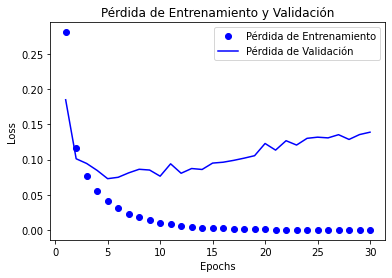

In [13]:
pinta_perdida_entrenamiento_validacion(historia0)

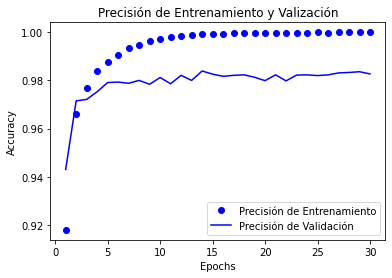

In [14]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [15]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network1 = compila_modelo(network1)

In [17]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1407 - accuracy: 0.8446 - val_loss: 1.0867 - val_accuracy: 0.8665
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9692 - accuracy: 0.8784 - val_loss: 0.8518 - val_accuracy: 0.9101
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8397 - accuracy: 0.9011 - val_loss: 0.8159 - val_accuracy: 0.9026
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7642 - accuracy: 0.9158 - val_loss: 0.7066 - val_accuracy: 0.9288
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7133 - accuracy: 0.9242 - val_loss: 0.6591 - val_accuracy: 0.9394
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6756 - accuracy: 0.9309 - val_loss: 0.6418 - val_accuracy: 0.9402
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6477 - accuracy: 0.9342 - val_loss: 0.6359 - val_accuracy: 0.9401
Epoch 

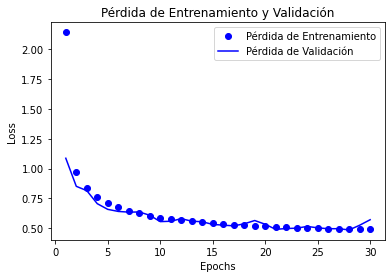

In [18]:
pinta_perdida_entrenamiento_validacion(historia1)

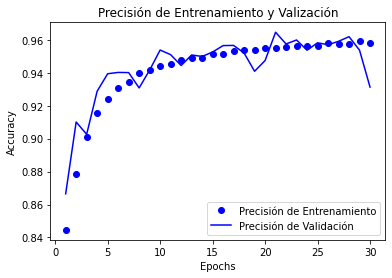

In [19]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [20]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
network2 = compila_modelo(network2)

In [22]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5274 - accuracy: 0.9117 - val_loss: 0.2963 - val_accuracy: 0.9547
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2649 - accuracy: 0.9541 - val_loss: 0.2152 - val_accuracy: 0.9661
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2098 - accuracy: 0.9633 - val_loss: 0.2033 - val_accuracy: 0.9638
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1858 - accuracy: 0.9674 - val_loss: 0.1818 - val_accuracy: 0.9672
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1726 - accuracy: 0.9706 - val_loss: 0.1910 - val_accuracy: 0.9642
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1624 - accuracy: 0.9713 - val_loss: 0.1670 - val_accuracy: 0.9710
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1572 - accuracy: 0.9733 - val_loss: 0.1520 - val_accuracy: 0.9745
Epoch 

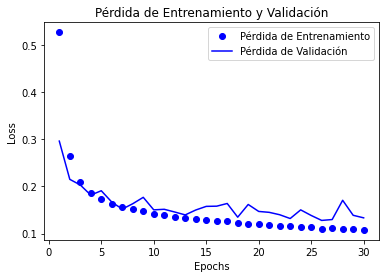

In [23]:
pinta_perdida_entrenamiento_validacion(historia2)

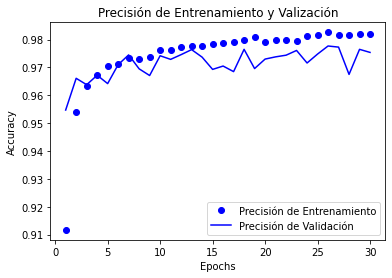

In [24]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [25]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
network3 = compila_modelo(network3)

In [27]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 2.3367 - accuracy: 0.8264 - val_loss: 1.0568 - val_accuracy: 0.8829
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 1.0498 - accuracy: 0.8615 - val_loss: 0.9876 - val_accuracy: 0.8631
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9478 - accuracy: 0.8775 - val_loss: 0.8667 - val_accuracy: 0.9004
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8820 - accuracy: 0.8908 - val_loss: 0.8676 - val_accuracy: 0.8907
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8279 - accuracy: 0.9010 - val_loss: 0.8476 - val_accuracy: 0.8919
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7863 - accuracy: 0.9102 - val_loss: 0.7185 - val_accuracy: 0.9321
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7538 - accuracy: 0.9165 - val_loss: 0.7422 - val_accuracy: 0.9292
Epoch 

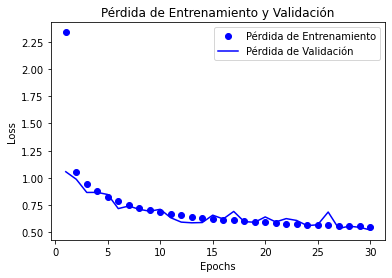

In [28]:
pinta_perdida_entrenamiento_validacion(historia3)

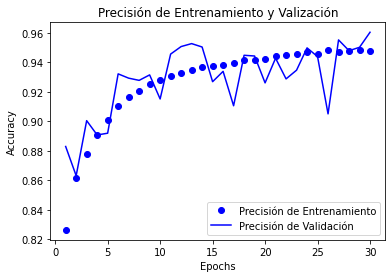

In [29]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [30]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
network4 = compila_modelo(network4)

In [32]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3482 - accuracy: 0.8980 - val_loss: 0.1483 - val_accuracy: 0.9594
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1688 - accuracy: 0.9499 - val_loss: 0.1157 - val_accuracy: 0.9664
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1293 - accuracy: 0.9616 - val_loss: 0.0979 - val_accuracy: 0.9708
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1055 - accuracy: 0.9688 - val_loss: 0.0936 - val_accuracy: 0.9736
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9726 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0823 - accuracy: 0.9753 - val_loss: 0.0854 - val_accuracy: 0.9770
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.0813 - val_accuracy: 0.9777
Epoch 

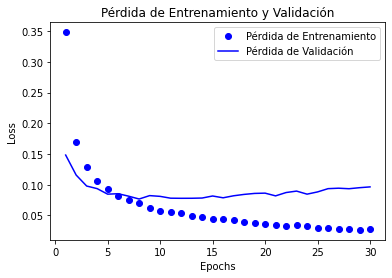

In [33]:
pinta_perdida_entrenamiento_validacion(historia4)

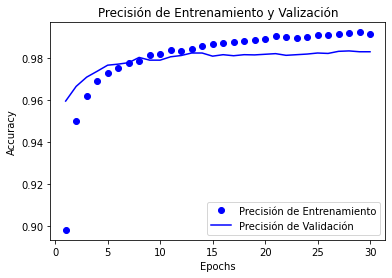

In [34]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [35]:
network5 = crea_modelo(5)

El número introducido no sirve. Debe estar entre 0 y 4.


### CONCLUSIONES
Lógicamente, el caso 0 (sin regularizador) no funciona correctamente, pues en tan solo 12 épocas se sobreentrena. Además, la gráfica muestra una gran diferencia entre los valores de validación y los de entrenamiento tanto en la pérdida como en la precisión.

En orden de menor a mayor eficiencia de regularizadores concluyo que:

 - Los menos óptimos son l1 y l1_l2, pues aunque devuelven una gran precsión del modelo, la función de pérdida se encuentra por encima de 0.5.
 - A continuación, el regularizador l2 es bastante potente para nuestro ejemplo, puesto que el valor de pérdida se encuentra alrededor del 0.1 y la precisión está sobre el 0.97.
 - Por último, el más óptimo corresponde al caso en el que se usa el dropout. Pues la pérdida se encuentra **por debajo del 0.1** y la precisión es de un 0.98.

 Se debe destacar que al aplicar cualquier regularizador, en todas las gráficas podemos observar que la línea de validación se ciñe bastante a la de entrenamiento, tanto en la pérdida como en la precisión.
 Otra cosa importante, es que lo que buscamos al resolver el problema es una gran precisión, de forma que aquellos modelos que he citado como menos óptimos, funcionarían bien aún con un valor de pérdida alto.